# <center>Machine Intelligence 1</center>

<h2 align="right">Exercise Sheet 03</h2> 

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

### 5.1 The bias variance tradeoff (5 points)

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<img src="Auswahl_2015-11-16_001.png" />

In [2]:
# preparing data
def f_(x):
    return -np.sin(5*np.pi*x) + 2*np.power(2*x - 1, 3)

def gen_data(mean=0,sigma=1,start=0,end=1.01,steps=0.02):
    x = np.arange(start, end, steps)
    y = f_(x) + np.random.normal(mean,sigma,x.shape)
    return x,y

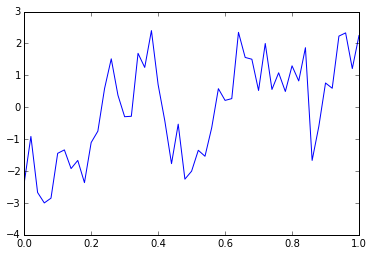

In [3]:
x,y = gen_data()
plt.plot(x,y)
plt.show()

<img src="Auswahl_2015-11-16_002.png" />

In [4]:
def poly(x,y,order):
    c = np.polyfit(x,y,order)
    return np.poly1d(c)

C:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


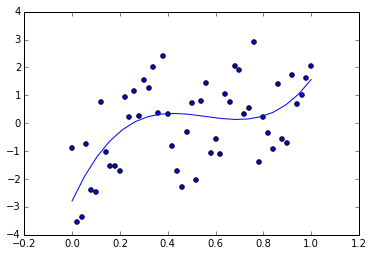

coefficients (starting with highest power): [ 21.3483679  -35.69620887  18.7018592   -2.78838123]


In [5]:
## test monomial function
# generate data
x,y = gen_data()
plt.scatter(x,y)
#plt.plot(x,y)

# find coefficients for order 3
p = poly(x,y,3)

# plot the result
p_x = np.linspace(0,1,num=20)
plt.plot(p_x, p(p_x))
plt.show()

# show coefficiants used
print 'coefficients (starting with highest power):', p.c

In [6]:
def cn_input(x,y,order):
    p = poly(x,y,order)
    # find the power to every coef and evaluate the monom
    return np.array([np.power(x,i)*c for i,c in enumerate(p.c[::-1])]).T, p(x)

In [7]:
from sklearn.preprocessing import normalize

def normalize_sample(x,y):
    normalize(x, copy=False)
    sum = y.sum()
    for i in range(len(y)):
        y[i] = y[i] / sum
        
def decorrelate_sample(x,y):
    pass

In [8]:
# imports for network
from pybrain.tools.shortcuts import buildNetwork
#from pybrain.structure import TanhLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

In [151]:
# depricated!
#N = 40
#orders = [1,5,9,14]
#nets = []
#datasets = []
#for o in orders:
#    _in, _out = o + 1, 1
#    net = buildNetwork(_in, _out, bias=False)
#    nets.append(net)
#    ds = SupervisedDataSet(_in, _out)
#    datasets.append(ds)
#    for i in range(N):
#        x,y = gen_data()
#        sample_x, sample_y = cn_input(x,y,o)
#        normalize_sample(sample_x, sample_y)
#        decorrelate_sample(sample_x, sample_y)
#        for i,sample in enumerate(sample_x):
#            ds.addSample(sample, sample_y[i])
#    trainer = BackpropTrainer(net, ds)
#    trainer.train()

In [9]:
# generate 40 different samples
N = 40
raw_data = []
for i in range(N):
    x,y = gen_data()
    raw_data.append((x,y))
    
orders = [1,5,9,14]
nets = []
datasets = []
for o in orders:
    _in, _out = o + 1, 1
    net = buildNetwork(_in, _out)
    nets.append(net)
    ds = SupervisedDataSet(_in, _out)
    datasets.append(ds)
    for i in range(N):
        sample_x, sample_y = cn_input(raw_data[i][0], raw_data[i][1], o)
        normalize_sample(sample_x, sample_y)
        decorrelate_sample(sample_x, sample_y)
        for i,sample in enumerate(sample_x):
            ds.addSample(sample, sample_y[i])
    trainer = BackpropTrainer(net, ds)
    trainer.train()

In [347]:
for net in nets:
    print '_in',net.indim
    print str(net)
    print '_out',net.outdim
    print 
    

_in 2
FeedForwardNetwork-529
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-527': 'in' -> 'out'>, <FullConnection 'FullConnection-528': 'bias' -> 'out'>]

_out 1

_in 6
FeedForwardNetwork-535
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-533': 'in' -> 'out'>, <FullConnection 'FullConnection-534': 'bias' -> 'out'>]

_out 1

_in 10
FeedForwardNetwork-541
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-539': 'in' -> 'out'>, <FullConnection 'FullConnection-540': 'bias' -> 'out'>]

_out 1

_in 15
FeedForwardNetwork-547
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <LinearLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-545': 'in' -> 'out'>, <FullConnection 'FullConnection-546': 'bias' -> 'out'>]

_out 1



<img src="Auswahl_2015-11-16_003.png"/>

In [10]:
predictions = []
for i in range(len(orders)):
    preds = np.array([[nets[i].activate(_in), _out] for _in, _out in datasets[i]])
    predictions.append(preds)
    print 'model of order',orders[i]
    print 'average prediction',preds.mean(axis=0)[0]
    print 'variance of prediction',preds.var(axis=0)[0]
    bias = preds.mean(axis=0)[0] - preds[:,1]
    print 'bias',bias.mean()
    print

model of order 1
average prediction [-0.0806203]
variance of prediction [ 0.06873683]
bias -0.100228144783

model of order 5
average prediction [-0.08447712]
variance of prediction [ 0.25388572]
bias -0.104084961048

model of order 9
average prediction [ 0.44123386]
variance of prediction [ 0.08617427]
bias 0.421626020356

model of order 14
average prediction [ 0.1103588]
variance of prediction [ 0.04057787]
bias 0.0907509564398



<img src="Auswahl_2015-11-16_004.png"/>

In [11]:
np_datasets = []
np_outs = []
np_predictions = []
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.set_size_inches(18.5, 10.5)
for i,a in enumerate([ax1,ax2,ax3,ax4]):
    np_datasets.append(np.reshape(datasets[i]['input'],(40,51,orders[i]+1)))
    np_outs.append(np.reshape(datasets[i]['target'],(40,51)))
    np_predictions.append(np.reshape(predictions[i],(40,51,2)))
    a.set_title('#'+str(i+1))
    #print np_predictions[i][:,:,0].T.shape
    a.plot(,np_predictions[i][:,:,0].T)
    #print np_datasets[i][:,:,0].shape
    #a.scatter(np_datasets[i][:,:,0].T,np_datasets[i][:,:,1].T)
    #a.scatter(np_datasets[i][:,:,0].T,np_outs[i].T)

SyntaxError: invalid syntax (<ipython-input-11-82e6fac22973>, line 12)

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
In [ ]:

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.set_size_inches(18.5, 10.5)
f.set_size_inches(18.5, 10.5)
for i,a in enumerate([ax1,ax2,ax3,ax4]):
    var = predictions[i].var(axis=0)[0]
    bias = (predictions[i].mean(axis=0)[0] - predictions[i][:,1]).mean()
    
    

<img src="Auswahl_2015-11-16_005.png"/>

### 5.2 Nested Cross Validation (5 points)

<img src="Auswahl_2015-11-16_006.png"/>

<img src="Auswahl_2015-11-16_007.png"/>

<img src="Auswahl_2015-11-16_008.png"/>

<img src="Auswahl_2015-11-16_009.png"/>